In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# Replace 0s in columns where 0 is not a valid value with NaN
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
# Step 1: Summary Statistics (with missing values)
summary_stats = df.describe()
summary_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Step 2: Handling missing values using median imputation
df_filled = df.copy()
df_filled[cols_with_invalid_zeros] = df_filled[cols_with_invalid_zeros].fillna(df_filled[cols_with_invalid_zeros].median())
df_filled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Figure size 1200x800 with 0 Axes>

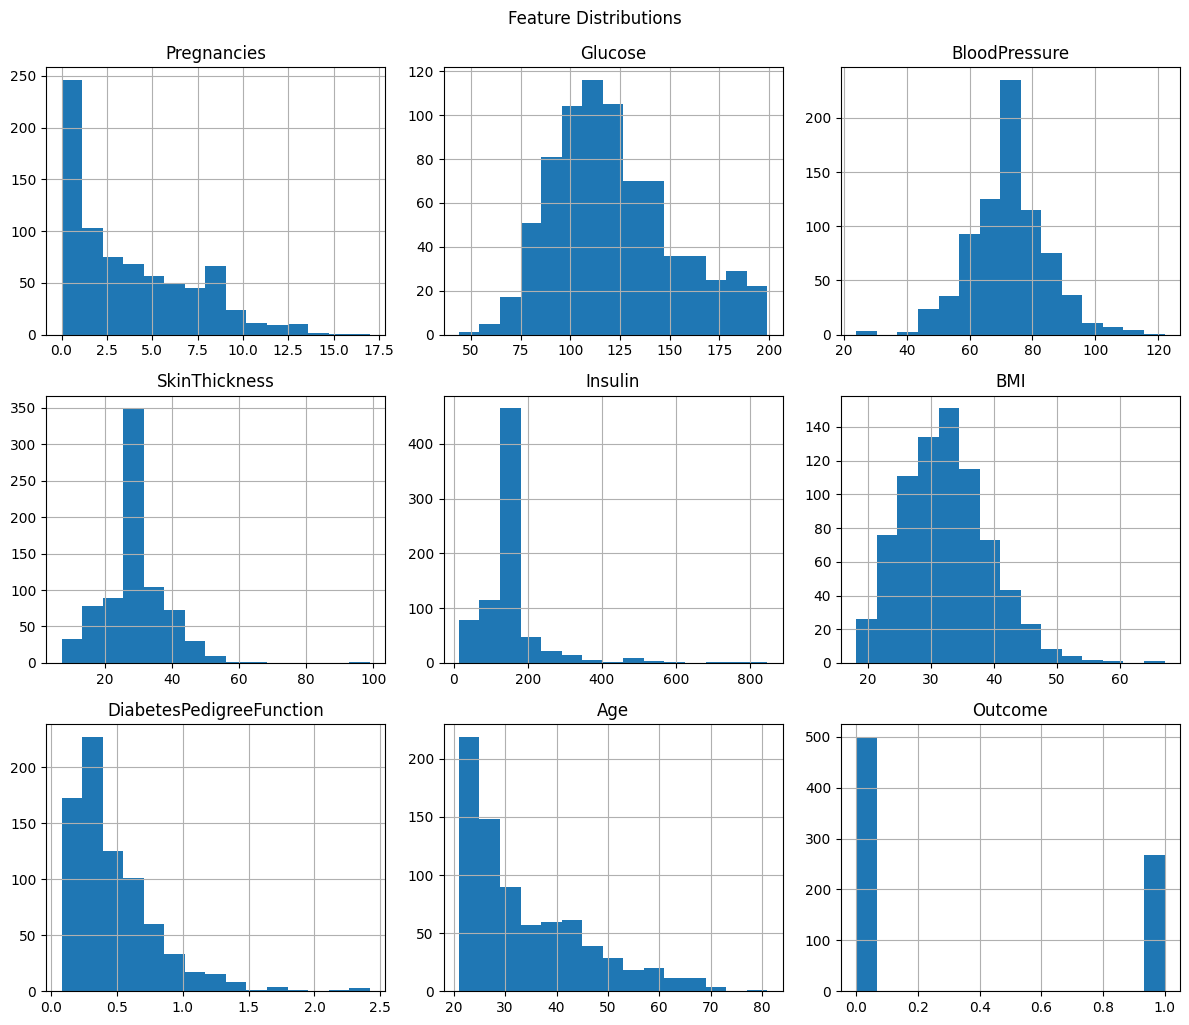

In [11]:
# Step 4: Histograms
plt.figure(figsize=(12, 8))
df_filled.hist(bins=15, figsize=(12, 10), layout=(3, 3))
plt.tight_layout()
plt.suptitle("Feature Distributions",y=1.02)
plt.show()

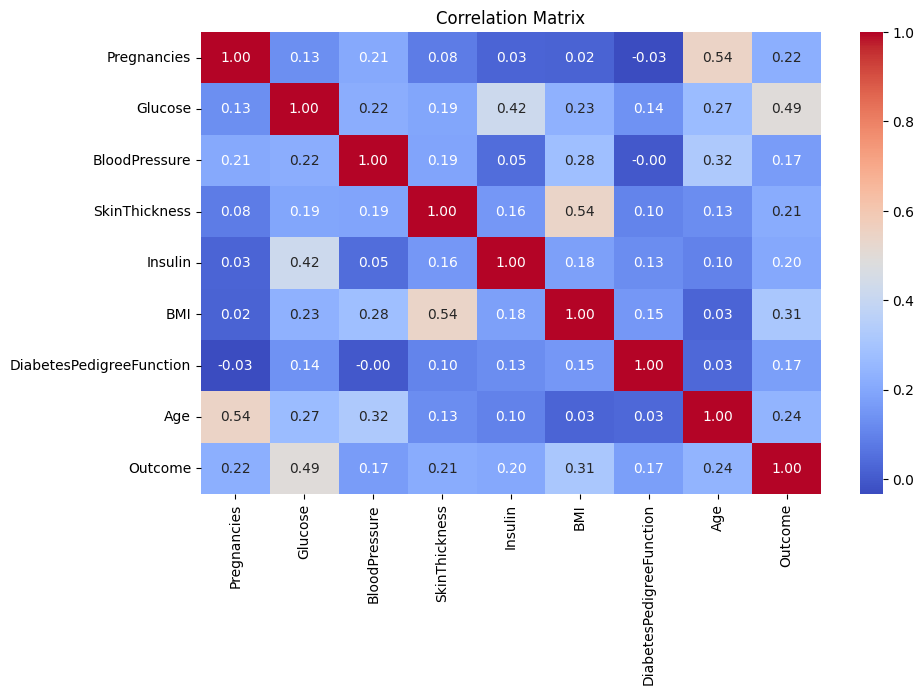

In [12]:
# Step 5: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_filled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

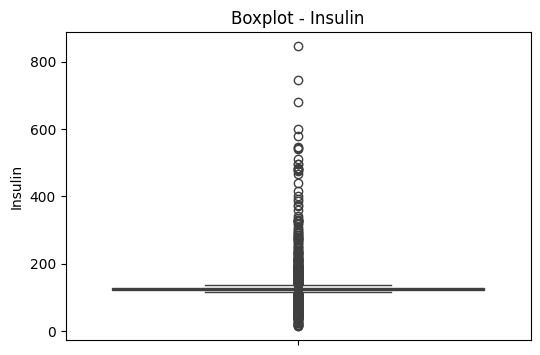

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_filled, y='Insulin')
plt.title("Boxplot - Insulin")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df_filled.drop('Outcome', axis=1)
y = df_filled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 614
Test set size: 154


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df_filled['Insulin'].quantile(0.25)
Q3 = df_filled['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_no_outliers = df_filled[(df_filled['Insulin'] >= lower_bound) & (df_filled['Insulin'] <= upper_bound)]

# Step 4: Check new size
print("Original data size:", df_filled.shape)
print("After removing Insulin outliers:", df_no_outliers.shape)


Original data size: (768, 9)
After removing Insulin outliers: (422, 9)


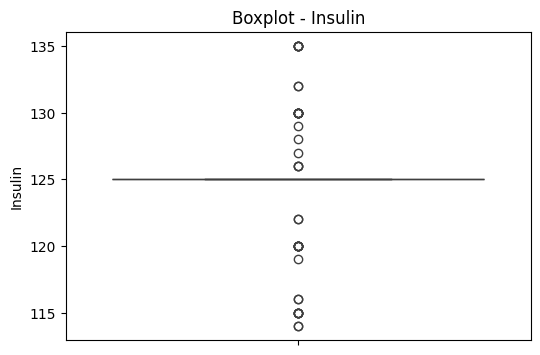

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_no_outliers, y='Insulin')
plt.title("Boxplot - Insulin")
plt.show()